In [1]:
import torch
from PIL import Image
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
import timm
import argparse
import yaml
import sys

sys.path.append("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Libs")
import RS_dataset
import RS_models
import RS_utils

import map_dataset

import rasterio
import numpy as np 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
from torch.nn.utils.rnn import pad_sequence
import torchvision.transforms.functional as F


/mnt/hdd/eric/.conda/envs/mapv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [2]:
#--- argparser
parser = argparse.ArgumentParser()
parser.add_argument('--cfg', type=str, default='/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/07.Challenge/01.MapYourCity_HuggingFace/configs/finetune_4.yaml')
args = parser.parse_args([])
cfg = argparse.Namespace(**yaml.load(open(args.cfg), Loader=yaml.SafeLoader))

In [3]:
input_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Map_Your_City/building-age-dataset/"
train_path = input_path + "train/data/"
test_path = input_path + "test/data/"
train_df = pd.read_csv(input_path + "train/train-set.csv")
test_df = pd.read_csv(input_path + "test/test-set.csv") 

In [4]:
#--- data split 
names_data = os.listdir(train_path)
# if cfg.SAMPLE:
#     parse_idx = int(len(names_data) * 0.01)
#     names_data = names_data[:parse_idx]
names_train, names_valid = train_test_split(names_data, test_size=0.1, random_state=1)

In [5]:
# 814 , 804 번 index 예외 나왔다. 혼자 사이즈 다름. 38

804
(3, 376, 376)


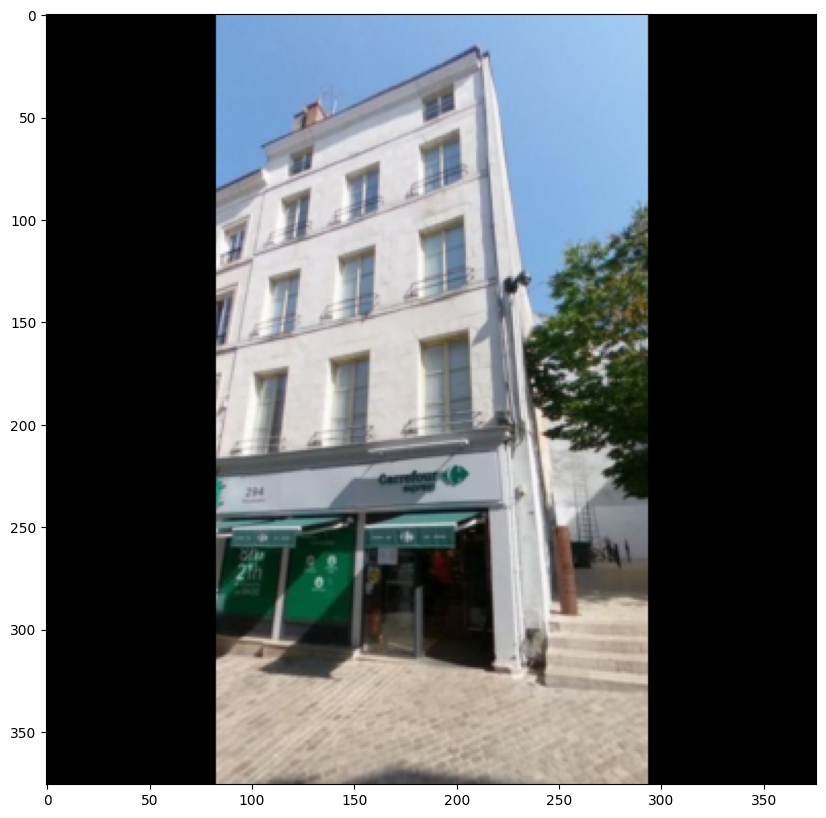

In [6]:
# width : height = 2 : 3 = 1000 : 1500
# 256 : 375

# data_transform = torchvision.transforms.Resize(
#     size=256, max_size= 376
# )


train_set = map_dataset.Map_Dataset_v3(names_train, train_path, 376, cfg  ) 
test_set = map_dataset.Map_Dataset_v3(names_valid, train_path, 376, cfg  )  

import random
qq = random.randint(0,999)
qq = 804
print(qq)
aa = train_set.__getitem__(qq)[0]
bb = test_set.__getitem__(qq)[0]
aa = np.asarray(aa)
bb = np.asarray(bb)

print(aa.shape)
#print(bb.shape)
#plt.imshow(aa)

aa = torch.Tensor(aa)
RS_utils.torch_display(aa,False,denormal=True)


In [15]:
trainloader = DataLoader(train_set, 32, shuffle=True, num_workers=8, pin_memory=True, drop_last=False)

In [16]:
qwe = next(iter(trainloader))

In [17]:
qwe[0].shape

torch.Size([32, 3, 376, 376])

In [18]:
train_set = Map_Dataset(names_train,data_transform,train_path) 
trainloader = DataLoader(train_set, 32, shuffle=True, num_workers=8, pin_memory=True, drop_last=True)

In [20]:
batch_size= 8
(batch_size / 1024) * 1e-3

7.8125e-06

In [19]:
from tqdm import tqdm
tmp_ = []

for name in tqdm(names_data):
    full_name = os.path.join(train_path, name, 'street.jpg')
    X1 = Image.open(full_name).convert('RGB')
    X1 = np.asarray(X1)
    tmp_.append(X1.shape)
    #print(X1.shape)

  3%|▎         | 785/30849 [00:04<02:38, 189.21it/s]


KeyboardInterrupt: 

In [116]:
tmp_

[(523, 1024, 3),
 (1024, 512, 3),
 (1024, 630, 3),
 (1000, 1440, 3),
 (1000, 1440, 3),
 (1024, 512, 3),
 (1000, 1440, 3),
 (580, 1024, 3),
 (1024, 512, 3),
 (1024, 680, 3),
 (804, 1024, 3),
 (1024, 512, 3),
 (532, 766, 3),
 (1024, 846, 3),
 (1024, 512, 3),
 (480, 640, 3),
 (670, 1024, 3),
 (1024, 968, 3),
 (1024, 741, 3),
 (1024, 920, 3),
 (1000, 1440, 3),
 (480, 640, 3),
 (1000, 1440, 3),
 (865, 1024, 3),
 (1024, 512, 3),
 (1024, 512, 3),
 (1024, 512, 3),
 (1024, 512, 3),
 (768, 1024, 3),
 (621, 1024, 3),
 (1000, 1440, 3),
 (1000, 1440, 3),
 (1024, 589, 3),
 (1024, 896, 3),
 (512, 1024, 3),
 (684, 1024, 3),
 (1024, 533, 3),
 (1024, 512, 3),
 (1024, 512, 3),
 (1024, 827, 3),
 (1024, 607, 3),
 (711, 1024, 3),
 (512, 1024, 3),
 (614, 1024, 3),
 (1000, 1440, 3),
 (1024, 689, 3),
 (512, 1024, 3),
 (1000, 1440, 3),
 (1024, 512, 3),
 (512, 1024, 3),
 (512, 1024, 3),
 (512, 1024, 3),
 (1024, 512, 3),
 (1024, 621, 3),
 (772, 1024, 3),
 (1024, 512, 3),
 (1024, 606, 3),
 (1024, 692, 3),
 (1024, 

width mean :  892.7150636973646


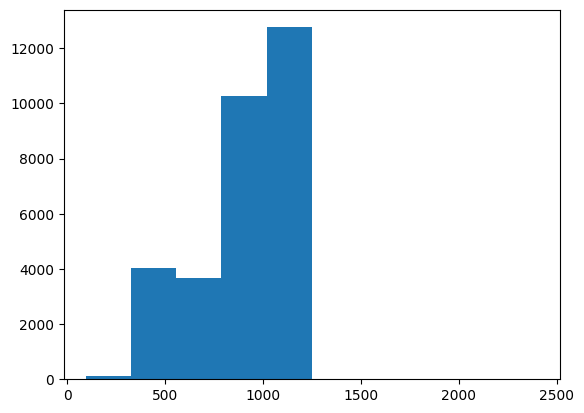

In [123]:
width_s = [t[0] for t in tmp_]
height_s = [t[1] for t in tmp_]

plt.hist(width_s)
print("width mean : " , np.mean(width_s))

height mean :  949.8062497974003


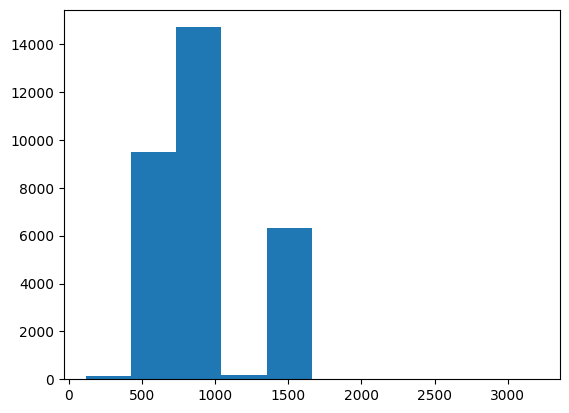

In [122]:
plt.hist(height_s)
print("height mean : " , np.mean(height_s))

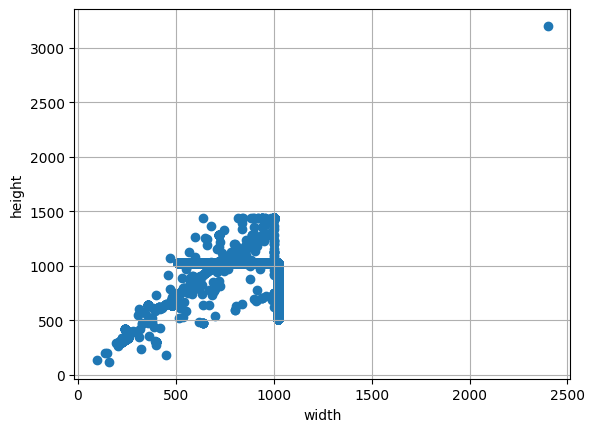

<Figure size 1200x1200 with 0 Axes>

In [126]:
plt.scatter(width_s, height_s)
plt.xlabel("width")
plt.ylabel("height")
plt.grid()
plt.figure(figsize=(12,12))
plt.show()

<class 'torch.Tensor'>
total :  30849
idx :  25003
label :  5
1993-2006


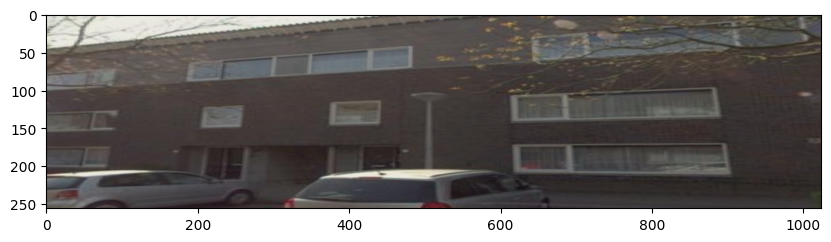

In [52]:
import random
idx = random.randint(0,len(names_data))

t_img = train_set.__getitem__(idx)[0]

print(type(t_img))
if str(type(t_img)).__contains__("torch"):
    RS_utils.torch_display(t_img, False,True)
elif str(type(t_img)).__contains__("numpy"):
    print(t_img.shape)
    #plt.imshow(t_img)
    

     
label = train_set.__getitem__(idx)[-1]
print("total : ", len(names_data))
print("idx : ",idx)
print("label : ",label)

label_map ={
    "x<1930" : 0,
    "1930-1945" : 1,
    "1946-1960" : 2,
    "1961-1976" : 3,
    "1977-1992" : 4, 
    "1993-2006" : 5,
    "x>2006" : 6
    }

for i, v in label_map.items():
    if label == v:
        print(i)